## Project Title: Investigating Property Transactions and Customer Satisfaction.

# Introduction:

> The real estate market is a complex and dynamic entity of great interest for professionals in the field, investors, policymakers, and data analysts that wish to thoroughly understand the market conditions and customer behavior and make informed decisions. In this project, the client—a leading company in the industry—has collected data on properties and their customers and wishes you to help them with the real estate analysis.

**Objectives**:

*   Preprocess, analyze, and visualize the real estate property data.

*   Generating meaningful insights about property transactions and customer profiles.

*   Answer basic business questions relevant to the real estate market using the datasets.



**Question 1.**

What is the average area of building type 1 in the data set in squared feet?

**Question 2.**

What is the most common property type sold?

**Question 3.**

Which building has the highest average property price?

**Question 4.**

What is the average cost of a building in Mexico?

**Question 5.**

Based on the data, which state has the second-highest number of properties sold?

**Question 6.**

Based on the customer demographics, what is the most common age range of property buyers?

**Question 7.**

Considering you have split the price variable into 10 equal intervals, how many unsold properties are there in the last interval \$496,201–\$538,272:

**Question 8.**

What is the correlation between the customer's age and the property price?

**Question 9.**

Which country has the highest average deal satisfaction?

**Question 10.**

Looking at the histogram of age distribution, what can you infer about the shape of the distribution?

**Question 11.**

Which building had the highest sales in 2004 according to the data?

**Question 12.**

Which state account for 82% of the company revenue?

**Question 13.**

Which year brought in the highest revenue?

**Question 14.**

Referring to the stacked area chart showing the total number of sales per year by building, which building showed a significant decrease in sales over the years?


# Load Datasets

Load the `properties.csv` and 'customers.csv' files into pandas DataFrames and display the first few rows of each to verify.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Create variables 'file_path_1' and 'file_path_2' to store data location in drive.
file_path_1 = '/content/drive/MyDrive/datascience_365 Projects/customers.csv'
file_part_2 = '/content/drive/MyDrive/datascience_365 Projects/properties.csv'
# file_path_1 = '/content/customers.csv'
# file_part_2 = '/content/properties.csv'

# Load data into dataframes 'df_custoners' and 'df_properties'.
df_customers = pd.read_csv(file_path_1)
df_properties = pd.read_csv(file_part_2)

# Display the first five rows of both the 'properties' and 'customers' DataFrames.
print('Properties DataFrame head:')
print(df_properties.head())
print('\nCustomers DataFrame head:')
print(df_customers.head())

Properties DataFrame head:
   Unnamed: 0   ﻿id  building  date_sale       type  property#     area  \
0           0  1030         1  11/1/2005  Apartment         30   743.09   
1           1  1029         1  10/1/2005  Apartment         29   756.21   
2           2  2002         2   7/1/2007  Apartment          2   587.28   
3           3  2031         2  12/1/2007  Apartment         31  1604.75   
4           4  1049         1  11/1/2004  Apartment         49  1375.45   

          price  status customerid  
0  $246,172.68    Sold      C0028   
1  $246,331.90    Sold      C0027   
2  $209,280.91    Sold      C0112   
3  $452,667.01    Sold      C0160   
4  $467,083.31    Sold      C0014   

Customers DataFrame head:
   Unnamed: 0 ﻿customerid      entity     name  surname  birth_date  sex  \
0           0       C0110  Individual   Kareem      Liu   5/11/1968    F   
1           1       C0010  Individual  Trystan  Oconnor  11/26/1962    M   
2           2       C0132  Individual     Kal

# Exploratory Data Analysis (EDA).

### Inspect Data Information and Types

Inspect the data types, non-null values, and column names for both DataFrames using the `.info()` method to identify potential inconsistencies or issues.


In [3]:
print('Properties DataFrame Info:')
df_properties.info()

print('\nCustomers DataFrame Info:')
df_customers.info()

Properties DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB

Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    

### Check for Missing Values

Check for missing values in both the `df_properties` and `df_customers` using `.isnull().sum()` method on both DataFrames to assess data completeness.

In [4]:
print('Missing values in Properties DataFrame:')
print(df_properties.isnull().sum())

print('\nMissing values in Customers DataFrame:')
print(df_customers.isnull().sum())

Missing values in Properties DataFrame:
Unnamed: 0     0
﻿id            0
building       0
date_sale      0
type           0
property#      0
area           0
price          0
status         0
customerid    72
dtype: int64

Missing values in Customers DataFrame:
Unnamed: 0           0
﻿customerid          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64


### Check for data inconsistencies
Check for data inconsistencies(spellings and data accuracy) in column names and their Values.

In [5]:
# Inspect column names for inconsistencies
print(df_properties.columns, '\n')
print(df_customers.columns)

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object') 

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [6]:
try:
  print("Unique customer IDs in df_properties:")
  print(df_properties['customerid'].unique())

  print("\nUnique customer IDs in df_customers:")
  print(df_customers['customerid'].unique())
  # print("\nData type of customerid in df_properties:")
  # print(df_properties['customerid'].dtype)

  # print("\nData type of customerid in df_customers:")
  # print(df_customers['customerid'].dtype)
except KeyError as e:
  print(f"KeyError: {e}")



Unique customer IDs in df_properties:
[' C0028 ' ' C0027 ' ' C0112 ' ' C0160 ' ' C0014 ' ' C0125 ' ' C0166 '
 ' C0034 ' ' C0170 ' ' C0009 ' ' C0041 ' ' C0057 ' ' C0061 ' ' C0089 '
 ' C0159 ' ' C0171 ' ' C0042 ' ' C0093 ' ' C0051 ' ' C0064 ' ' C0128 '
 ' C0019 ' ' C0037 ' ' C0127 ' ' C0018 ' ' C0040 ' ' C0080 ' ' C0083 '
 ' C0085 ' ' C0091 ' ' C0007 ' ' C0048 ' ' C0065 ' ' C0096 ' ' C0164 '
 ' C0038 ' ' C0087 ' ' C0142 ' ' C0015 ' ' C0122 ' ' C0017 ' ' C0020 '
 ' C0086 ' ' C0150 ' ' C0156 ' ' C0169 ' ' C0022 ' ' C0072 ' ' C0136 '
 ' C0149 ' ' C0011 ' ' C0073 ' ' C0110 ' ' C0111 ' ' C0123 ' ' C0070 '
 ' C0075 ' ' C0076 ' ' C0105 ' ' C0135 ' ' C0153 ' ' C0047 ' ' C0060 '
 ' C0066 ' ' C0068 ' ' C0090 ' ' C0095 ' ' C0151 ' ' C0162 ' ' C0010 '
 ' C0054 ' ' C0056 ' ' C0081 ' ' C0084 ' ' C0016 ' ' C0035 ' ' C0062 '
 ' C0099 ' ' C0114 ' ' C0006 ' ' C0053 ' ' C0069 ' ' C0077 ' ' C0168 '
 ' C0058 ' ' C0107 ' ' C0131 ' ' C0144 ' ' C0098 ' ' C0130 ' ' C0141 '
 ' C0067 ' ' C0082 ' ' C0113 ' ' C0132 

**Error**: **explanation**

The `error KeyError: 'customerid'` happened because the `df_customers` DataFrame, when that cell ran, still had a column named **`customerid`** (with a hidden character) instead of the plain `customerid` you were trying to access.

In [7]:
# Inspect column data in the  dataframes for inconsistencies using the `unique()` method.
print(f'Unique values in "building" column of df_properties: {df_properties["building"].unique()}')
print(f'\nUnique values in "type" column of df_properties: {df_properties["type"].unique()}')
print(f'\nUnique values in "status" column of df_properties: {df_properties["status"].unique()}')
print(f'\nUnique values in "sex" column of df_customers: {df_customers["sex"].unique()}')
print(f'\nUnique values in "state" column of df_customers: {df_customers["state"].unique()}')
print(f'\nUnique values in "purpose" column of df_customers: {df_customers["purpose"].unique()}')
print(f'\nUnique values in "mortgage" column of df_customers: {df_customers["mortgage"].unique()}')
print(f'\nUnique values in "source" column of df_customers: {df_customers["source"].unique()}')



Unique values in "building" column of df_properties: [1 2 3 4 5]

Unique values in "type" column of df_properties: ['Apartment' 'Office']

Unique values in "status" column of df_properties: [' Sold ' '-']

Unique values in "sex" column of df_customers: ['F' 'M' nan]

Unique values in "state" column of df_customers: ['California' nan 'Oregon' 'Arizona' 'Nevada' 'Colorado' 'Utah' 'Virginia'
 'Wyoming' 'Kansas']

Unique values in "purpose" column of df_customers: ['Home' 'Investment']

Unique values in "mortgage" column of df_customers: ['Yes' 'No']

Unique values in "source" column of df_customers: ['Website' 'Agency' 'Client']


In [8]:
# Display values counts in the 'status' column of df_properties using
# the `value_counts()` method.
print(df_properties['status'].value_counts())

status
 Sold     195
-          72
Name: count, dtype: int64


**Insight(s):**

*   The `status` column in the `df_properties` dataframe has two values '**sold**' and '**-**' with leading and trailing white spaces which will require cleaning.

*   The `custonerid` column in the `df_properties` dataframe has both leading and trailing white spaces which will also require cleaning

### Generate Descriptive Statistics

Generate descriptive statistics for all numerical columns in both `df_properties` and `df_customers` using `.describe()` method on both DataFrames to understand their distribution, central tendency, and variability.

In [9]:
print('Descriptive statistics for Properties DataFrame:')
print(df_properties.describe())

print('\nDescriptive statistics for Customers DataFrame:')
print(df_customers.describe())

Descriptive statistics for Properties DataFrame:
       Unnamed: 0          ﻿id    building   property#         area
count  267.000000   267.000000  267.000000  267.000000   267.000000
mean   133.000000  2975.142322    2.947566   27.580524   936.221311
std     77.220464  1392.197474    1.391794   15.361437   284.894858
min      0.000000  1002.000000    1.000000    1.000000   410.710000
25%     66.500000  2015.500000    2.000000   14.500000   756.210000
50%    133.000000  3024.000000    3.000000   28.000000   798.280000
75%    199.500000  4031.500000    4.000000   40.000000  1121.950000
max    266.000000  5052.000000    5.000000   59.000000  1942.500000

Descriptive statistics for Customers DataFrame:
       Unnamed: 0  deal_satisfaction
count  162.000000         162.000000
mean    80.500000           3.456790
std     46.909487           1.333276
min      0.000000           1.000000
25%     40.250000           3.000000
50%     80.500000           4.000000
75%    120.750000           5.0

## Summary of Initial Findings

### df_properties Observations:
*   **Initial Rows**: The `df_properties` DataFrame contains columns like `id`, `building`, `date_sale`, `type`, `property#`, `area`, `price`, `status`, and `customerid`.
*   **Data Types and Non-Null Values**:
    *   `date_sale` is of `object` type (string) and will need to be converted to datetime for time-series analysis.
    *   `price` is also an `object` type (string) and contains '$' and ',' characters, indicating it needs cleaning and conversion to a numerical type (float).
    *   `customerid` has 72 missing values, indicating that not all properties have an associated customer record, or some sales are not yet finalized/recorded with a customer.
    *   The `\ufeffid` column (likely `id` with a Byte Order Mark) is an `int64` type.
*   **Missing Values**: Only `customerid` has missing values (72 out of 267 entries).
*   **Descriptive Statistics**:
    *   The `area` column ranges from 410.71 to 1942.50 square feet, with a mean of approximately 936.22 sq ft. This provides a general idea of property sizes.
    *   `building` ID ranges from 1 to 5.

### df_customers Observations:
*   **Initial Rows**: The `df_customers` DataFrame includes `customerid`, `entity`, `name`, `surname`, `birth_date`, `sex`, `country`, `state`, `purpose`, `deal_satisfaction`, `mortgage`, and `source`.
*   **Data Types and Non-Null Values**:
    *   `birth_date` is an `object` type (string) and will require conversion to datetime for age calculation or time-based analysis.
    *   `sex` has 7 missing values.
    *   `state` has 8 missing values.
    *   The `\ufeffcustomerid` column (likely `customerid` with a Byte Order Mark) is an `object` type.
*   **Missing Values**: `birth_date` (7 missing), `sex` (7 missing), and `state` (8 missing) are the columns with missing values.
*   **Descriptive Statistics**:
    *   `deal_satisfaction` is an `int64` type, ranging from 1 to 5, with a mean satisfaction score of approximately 3.46, suggesting a generally moderate level of satisfaction.

### Overall Initial Thoughts:
*   **Data Cleaning**: Both DataFrames require some data cleaning, particularly type conversions for `date_sale`, `price`, and `birth_date`, and handling of missing values in `customerid`, `birth_date`, `sex`, and `state`.
*   **Column Names**: There are columns like `\ufeffid` and `\ufeffcustomerid` with a Byte Order Mark (BOM) character, which should be cleaned for easier access.
*   **Relationships**: The `customerid` column in `df_properties` and `customerid` in `df_customers` can be used to link the two datasets.

# Data Preprocessing and Cleaning

### Clean Column Names

Standardize column names across both DataFrames by converting them to lowercase and replacing spaces or special characters with underscores to ensure consistency.


In [10]:
# Clean the column names by removing the BOM character and converting them
# to lowercase for both dataframes
df_properties.columns = [col.replace('\ufeff', '') for col in df_properties.columns]
df_customers.columns = [col.replace('\ufeff', '') for col in df_customers.columns]

df_properties.columns = df_properties.columns.str.lower()
df_customers.columns = df_customers.columns.str.lower()

print('Cleaned Properties DataFrame columns:')
print(df_properties.columns)
print('\nCleaned Customers DataFrame columns:')
print(df_customers.columns)

Cleaned Properties DataFrame columns:
Index(['unnamed: 0', 'id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')

Cleaned Customers DataFrame columns:
Index(['unnamed: 0', 'customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [11]:
import re
# Standardize column names by replacing spaces and special characters with
# underscores to ensure consistency and facilitate easier access
def clean_column_name(col_name):
    col_name = re.sub(r'[^a-z0-9_]', '_', col_name) # Replace non-alphanumeric (excluding underscore) with underscore
    col_name = re.sub(r'__+', '_', col_name) # Replace multiple underscores with a single underscore
    return col_name.strip('_') # Remove leading/trailing underscores

df_properties.columns = [clean_column_name(col) for col in df_properties.columns]
df_customers.columns = [clean_column_name(col) for col in df_customers.columns]

print('Further Cleaned Properties DataFrame columns:')
print(df_properties.columns)
print('\nFurther Cleaned Customers DataFrame columns:')
print(df_customers.columns)

Further Cleaned Properties DataFrame columns:
Index(['unnamed_0', 'id', 'building', 'date_sale', 'type', 'property', 'area',
       'price', 'status', 'customerid'],
      dtype='object')

Further Cleaned Customers DataFrame columns:
Index(['unnamed_0', 'customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


### Handle Missing Values

Address missing values in both DataFrames based on the findings from the EDA. Calculate the mode for the 'sex' and 'state' columns in `df_customers` and then fill the respective missing values with these modes. Drop rows with missing 'birth_date' and then verify all missing values in `df_customers`.


In [12]:
#  Calculate the mode for the 'sex' and 'state' columns in df_customers and then
#  fill the respective missing values with these modes.
mode_sex = df_customers['sex'].mode()[0]
df_customers['sex'] = df_customers['sex'].fillna(mode_sex)

mode_state = df_customers['state'].mode()[0]
df_customers['state'] = df_customers['state'].fillna(mode_state)

# Drop rows where 'birth_date' is missing
df_customers.dropna(subset=['birth_date'], inplace=True)

print("Missing values in Customers DataFrame after handling:")
print(df_customers.isnull().sum())

Missing values in Customers DataFrame after handling:
unnamed_0            0
customerid           0
entity               0
name                 0
surname              0
birth_date           0
sex                  0
country              0
state                0
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64


### Correct Data Types

Convert columns to appropriate data types as needed (e.g., converting date strings to datetime objects, or numerical columns that were incorrectly parsed). Convert the 'date_sale' column to datetime objects, clean and convert the 'price' column to a float data type in `df_properties`. Then, I will display the info to verify the data types have changed.


In [13]:
# Convert the 'date_sale' column to datetime objects in 'df_properties'
df_properties['date_sale'] = pd.to_datetime(df_properties['date_sale'], format='%m/%d/%Y', errors='coerce')

# Clean and convert the 'price' column to a float data type in 'df_properties'
df_properties['price'] = df_properties['price'].replace('[$,]', '', regex=True).astype(float)

df_customers['birth_date'] = pd.to_datetime(df_customers['birth_date'], format='%m/%d/%Y', errors='coerce')

print('Properties DataFrame Info after type conversion:')
df_properties.info()
print('\nCustomers DataFrame Info after type conversion:')
df_customers.info()

Properties DataFrame Info after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unnamed_0   267 non-null    int64         
 1   id          267 non-null    int64         
 2   building    267 non-null    int64         
 3   date_sale   195 non-null    datetime64[ns]
 4   type        267 non-null    object        
 5   property    267 non-null    int64         
 6   area        267 non-null    float64       
 7   price       267 non-null    float64       
 8   status      267 non-null    object        
 9   customerid  195 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 21.0+ KB

Customers DataFrame Info after type conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count 

In [14]:
# Strip whitespace from 'customerid' and 'status' columns in df_properties before merging
df_properties['customerid'] = df_properties['customerid'].str.strip()
df_properties['status'] = df_properties['status'].str.strip()

### Merge Datasets

Merge the cleaned 'properties' and 'customers' DataFrames into a single DataFrame using their common field 'customerid' to integrate the data for further analysis.


In [15]:
# Merge the 'properties' and 'customers' DataFrames using a left merge on 'customerid'
df_merged = pd.merge(df_properties, df_customers, on='customerid', how='left')

# Display the head and info of the merged DataFrame to verify the successful integration
# of data
print('Merged DataFrame head:')
print(df_merged.head())
print('\nMerged DataFrame Info:')
df_merged.info()

Merged DataFrame head:
   unnamed_0_x    id  building  date_sale       type  property     area  \
0            0  1030         1 2005-11-01  Apartment        30   743.09   
1            1  1029         1 2005-10-01  Apartment        29   756.21   
2            2  2002         2 2007-07-01  Apartment         2   587.28   
3            3  2031         2 2007-12-01  Apartment        31  1604.75   
4            4  1049         1 2004-11-01  Apartment        49  1375.45   

       price status customerid  ...        name   surname birth_date sex  \
0  246172.68   Sold      C0028  ...     Madalyn    Mercer 1986-06-21   F   
1  246331.90   Sold      C0027  ...        Lara  Carrillo 1983-02-24   F   
2  209280.91   Sold      C0112  ...     Donavan   Flowers 1985-12-27   M   
3  452667.01   Sold      C0160  ...      Darien    Dorsey 1985-12-27   M   
4  467083.31   Sold      C0014  ...  Alessandra     Perry 1979-05-15   F   

  country       state     purpose deal_satisfaction mortgage   source

## Summary of Actions Taken:

*   **Initial Data Loading & Quality Issues:**
    *   Successfully loaded `properties.csv` and `customers.csv`.
    *   Identified Byte Order Mark (`\ufeff`) prefixes in `id` and `customerid` column names, requiring cleaning.
    *   Noted an `Unnamed: 0` column in both datasets, likely an artifact of index saving.
*   **Data Type Inconsistencies:**
    *   `df_properties`: `date_sale` and `price` were incorrectly parsed as `object` types. `price` also contained '$' and ',' characters.
    *   `df_customers`: `birth_date` was incorrectly parsed as an `object` type.
*   **Missing Values Identified:**
    *   `df_properties`: `customerid` had 72 missing values out of 267 entries (26.97%).
    *   `df_customers`: `birth_date` had 7 missing values, `sex` had 7 missing values, and `state` had 8 missing values.
*   **Column Name Cleaning:**
    *   Successfully removed `\ufeff` characters and converted all column names to lowercase.
    *   Standardized column names by replacing special characters and spaces with underscores (e.g., `property#` became `property`, `unnamed: 0` became `unnamed_0`).
*   **Missing Value Handling (Pre-Merge):**
    *   `df_customers`: Missing values in `sex` and `state` were imputed with their respective modes. Rows with missing `birth_date` were dropped, resulting in `df_customers` having no missing values in these columns.
    *   Missing `customerid` values in `df_properties` were intentionally left for handling during the merge phase.
*   **Data Type Correction:**
    *   `df_properties`: `date_sale` was converted to `datetime64[ns]` (invalid entries coerced to `NaT`). `price` was cleaned and converted to `float64`.
    *   `df_customers`: `birth_date` was converted to `datetime64[ns]`.
*   **Dataset Merging Outcome:**
    *   A left merge of `df_properties` with `df_customers` on `customerid` resulted in `df_merged` with 267 entries and 22 columns.
    *   Crucially, 72 entries in `df_merged` had null values for all customer-related columns (e.g., `name`, `surname`, `birth_date`, `sex`), indicating that 72 properties did not have a matching `customerid` in the `df_customers` dataset.
    *   The `customerid` column in `df_merged` contained 195 non-null values, reflecting the number of successful matches.

### Insights or Next Steps

*   The significant number of properties (72 out of 267, or 26.97%) without matching customer information after the left merge warrants further investigation to understand their status (e.g., unsold, new listings, or customer data residing in another source). This will determine whether these entries should be excluded or handled specifically in subsequent analyses.
*   The `unnamed_0` columns (now `unnamed_0_x` and `unnamed_0_y`) in the `df_merged` DataFrame are redundant index artifacts and should be dropped to clean the dataset before any further analytical modeling.


# Data Analysis

In [16]:
# Drop 'unnamed_0_x' and 'unnamed_0_y' columns in df_merged
# Reason: 'unnamed_0_x' and 'unnamed_0_y' are redundant index artifacts and should
# be dropped to clean the dataset before any further analytical modeling.
df_merged = df_merged.drop(columns=['unnamed_0_x', 'unnamed_0_y'])


In [17]:
# Inspect the first five rows
df_merged.head()

,id,building,date_sale,type,property,area,price,status,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency


**Question 1.**

What is the average area of building type 1 in the data set in squared feet?

In [18]:
# Calculate the average area of building type 1 in the 'df_merged' dataframe.
avg_area_building_1 = df_merged[df_merged['building'] == 1]['area'].mean()
print(f"The average area of building type 1 is: {avg_area_building_1:.2f} squared feet.")

The average area of building type 1 is: 928.04 squared feet.


**Question 2.**

What is the most common property type sold?

In [19]:
# Filter for sold properties
sold_properties = df_merged[df_merged['status'] == 'Sold']

# Get the most common property type among sold properties
most_common_type_sold = sold_properties['type'].mode()[0]

print(f"The most common property type sold is: {most_common_type_sold}")

The most common property type sold is: Apartment


**Question 3.**

Which building has the highest average property price?

In [20]:
# Calculate the average property price for each building.
average_price_by_building = df_merged.groupby('building')['price'].mean()

# Find the building with the highest average property price.
building_highest_avg_price = average_price_by_building.idxmax()
highest_avg_price = average_price_by_building.max()

print(f"Building {building_highest_avg_price} has the highest average property price of: ${highest_avg_price:,.2f}")

Building 4 has the highest average property price of: $290,239.52


**Question 4.**

What is the average cost of a building in Mexico?

In [21]:
# Slice the DataFrame to include only Mexico properties.
mexico_properties = df_merged[df_merged['country'] == 'Mexico']

# Use the 'price' column to calculate the average cost of a building in Mexico.
if not mexico_properties.empty:
    avg_price_mexico = mexico_properties['price'].mean()
    print(f"The average cost of a building in Mexico is: ${avg_price_mexico:,.2f}")
else:
    print("No properties found for Mexico in the dataset.")

The average cost of a building in Mexico is: $338,181.18


**Question 5.**

Based on the data, which state has the second-highest number of properties sold?

In [22]:
# Filter for sold properties
sold_properties = df_merged[df_merged['status'] == 'Sold']

# Count properties sold per state
properties_sold_by_state = sold_properties['state'].value_counts()

# Check if there are at least two states
if len(properties_sold_by_state) >= 2:
    # Get the state with the second-highest number of properties sold
    second_highest_state = properties_sold_by_state.index[1]
    print(f"The state with the second-highest number of properties sold is: {second_highest_state}")
else:
    print("There are not enough states with sold properties to determine the second-highest.")

The state with the second-highest number of properties sold is: Nevada


**Question 6.**

Based on the customer demographics, what is the most common age range of property buyers?

In [23]:
# Filter for sold properties with valid customer information
buyers_data = df_merged[(df_merged['status'] == 'Sold') & (df_merged['customerid'].notnull())].copy()

# Calculate age based on the date of sale and birth date for each buyer.
buyers_data['age'] = buyers_data['date_sale'].dt.year - buyers_data['birth_date'].dt.year

# Define age bins and labels
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Create age ranges
buyers_data['age_range'] = pd.cut(buyers_data['age'], bins=age_bins, labels=age_labels, right=False)

# Find the most common age range
most_common_age_range = buyers_data['age_range'].mode()[0]

print(f"The most common age range of property buyers is: {most_common_age_range}")

The most common age range of property buyers is: 36-45


**Question 7.**

Considering you have split the price variable into 10 equal intervals, how many unsold properties are there in the last interval \$496,201–\$538,272.

In [24]:
# Identify unsold properties
unsold_properties = df_merged[df_merged['status'] != 'Sold']

# Define the last interval bounds
lower_bound = 496201
upper_bound = 538272

# Filter unsold properties within the specified price range
unsold_in_last_interval = unsold_properties[
    (unsold_properties['price'] >= lower_bound) &
    (unsold_properties['price'] <= upper_bound)
]

# Count the number of properties
count = len(unsold_in_last_interval)

print(f"There are {count} unsold properties in the last interval ${lower_bound:,d}–${upper_bound:,d}.")

There are 6 unsold properties in the last interval $496,201–$538,272.


**Question 8.**

What is the correlation between the customer's age and the property price?

In [25]:
# Calculate age based on date_sale and birth_date
df_merged_for_correlation = df_merged.copy()
df_merged_for_correlation['age'] = (df_merged_for_correlation['date_sale'].dt.year - df_merged_for_correlation['birth_date'].dt.year)

# Drop rows with NaN values in 'age' or 'price' before calculating correlation
# This is important because NaNs would result in NaN correlation.
correlation_data = df_merged_for_correlation[['age', 'price']].dropna()

# Calculate the correlation between 'age' and 'price'
correlation = correlation_data['age'].corr(correlation_data['price'])

print(f"The correlation between customer's age and property price is: {correlation:.2f}")

The correlation between customer's age and property price is: -0.17


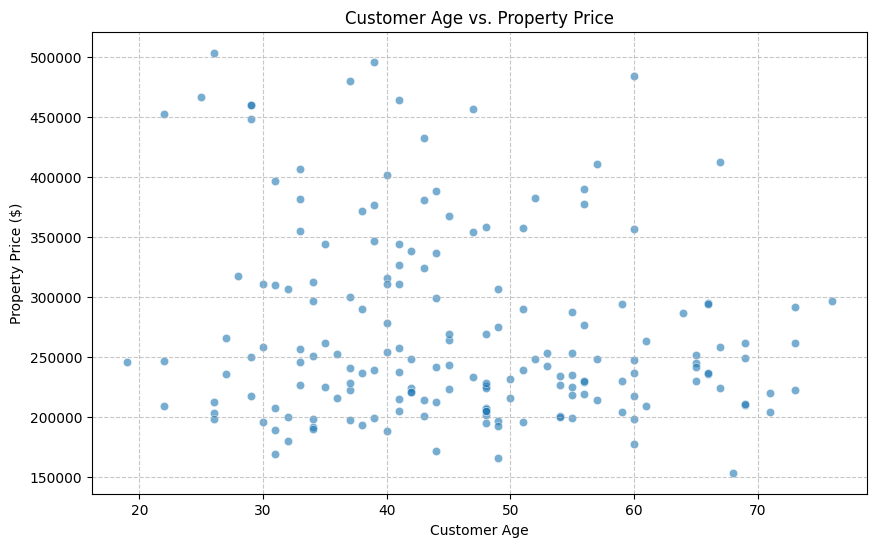

In [26]:
# Create a scatter plot of age vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=correlation_data, alpha=0.6)
plt.title("Customer Age vs. Property Price")
plt.xlabel("Customer Age")
plt.ylabel("Property Price ($)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**

A correlation coefficient of -0.17 indicates a weak negative linear relationship between a customer's age and property price. Which means  customer age doesn't have a strong predictive power over property price based on this data, but there is a slight tendency for younger buyers to purchase more expensive properties and older buyers to purchase less expensive ones.

**Question 9.**

Which country has the highest average deal satisfaction?

In [27]:
# Calculate the average deal satisfaction for each country
average_satisfaction_by_country = df_merged.groupby('country')['deal_satisfaction'].mean()

# Find the country with the highest average deal satisfaction
country_highest_satisfaction = average_satisfaction_by_country.idxmax()
highest_satisfaction_score = average_satisfaction_by_country.max()

print(f"The country with the highest average deal satisfaction is: {country_highest_satisfaction} with a score of {highest_satisfaction_score:.2f}")

The country with the highest average deal satisfaction is: Canada with a score of 5.00


**Question 10.**

Looking at the histogram of age distribution, what can you infer about the shape of the distribution?

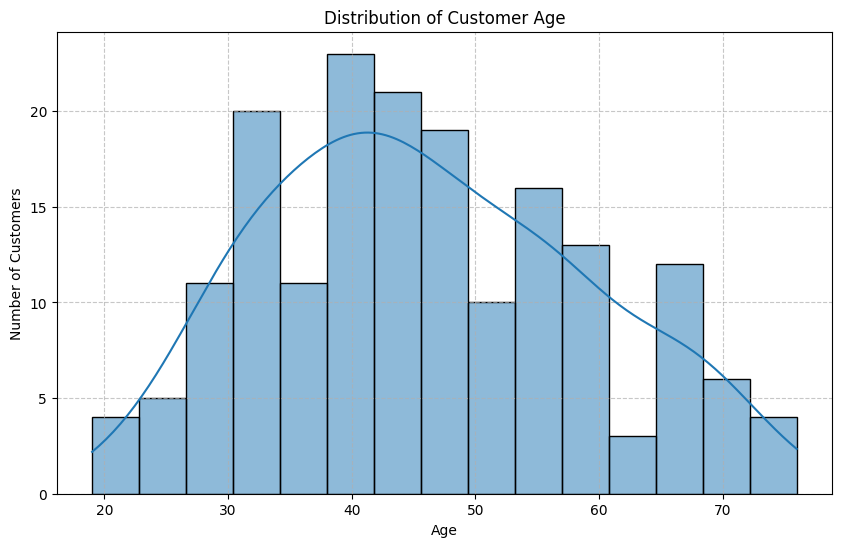

In [28]:
# Calculate age for customers (similar to previous age calculation, using a fixed year for consistency)
df_merged_for_age_dist = df_merged.copy()
# Use a representative year for age calculation, such as the latest sale year or a common year
# For simplicity and consistency with previous age calculations, let's use 2023.
# df_merged_for_age_dist['age'] = 2023 - df_merged_for_age_dist['birth_date'].dt.year
# Calculate age based on the date of sale and birth date for each buyer.
df_merged_for_age_dist['age'] = \
df_merged_for_age_dist['date_sale'].dt.year - df_merged_for_age_dist['birth_date'].dt.year

# Drop rows where 'age' is NaN (i.e., missing birth_date or date_sale)
age_data = df_merged_for_age_dist['age'].dropna()

# Plot the histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=15, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Insight:**

**Age Distribution:** The histogram shows a right-skewed, unimodal distribution with a wide spread, suggesting a concentration of younger to middle-aged buyers but also a presence of older customers.

**Question 11.**

Which building had the highest sales in 2004 according to the data?

In [29]:
# Filter for sales in the year 2004
sales_2004 = df_merged[df_merged['date_sale'].dt.year == 2004]

# Group by building and sum the sales (price)
total_sales_by_building_2004 = sales_2004.groupby('building')['price'].sum()

# Find the building with the highest sales
highest_sales_building_2004 = total_sales_by_building_2004.idxmax()
highest_sales_amount_2004 = total_sales_by_building_2004.max()

print(f"Building {highest_sales_building_2004} had the highest sales in 2004 with a total of ${highest_sales_amount_2004:,.2f}.")

Building 1 had the highest sales in 2004 with a total of $4,227,851.51.


**Question 12.**

Which state account for 82% of the company revenue?

In [30]:
# Calculate the total revenue generated by each state from the properties,
# ensuring to exclude properties with missing state information.
df_filtered = df_merged.dropna(subset=['state'])
revenue_by_state = df_filtered.groupby('state')['price'].sum()
print("Revenue by State:\n")
print(revenue_by_state)

Revenue by State:

state
Arizona        2854796.41
California    33782657.10
Colorado       2570287.08
Kansas          252185.99
Nevada         3915752.83
Oregon         2602526.55
Utah           1188776.40
Virginia        860576.75
Wyoming         204286.67
Name: price, dtype: float64


In [31]:
# Calculate the total revenue from the filtered dataframe.
total_revenue_filtered = df_filtered['price'].sum()

# Calculate the percentage of total revenue for each state
revenue_percentage = (revenue_by_state / total_revenue_filtered) * 100

# Sort the states by revenue in descending order
revenue_percentage_sorted = revenue_percentage.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = revenue_percentage_sorted.cumsum()

# Identify states that account for 82% of the company revenue
states_for_82_percent_revenue = cumulative_percentage[cumulative_percentage <= 82].index.tolist()

print(f"States accounting for 82% of company revenue: {states_for_82_percent_revenue}")

States accounting for 82% of company revenue: ['California', 'Nevada']


**Insights**
*   After excluding properties with missing state information, the total revenue for each state was calculated. California generated the highest revenue, totaling \$33,782,657.10.
*   California and Nevada combined account for 82% of the company's total revenue.


**Question 13.**

Which year brought in the highest revenue?

In [32]:
# Extract the year from the 'date_sale' column
df_merged['sale_year'] = df_merged['date_sale'].dt.year

# Filter out rows where 'sale_year' is NaN (i.e., properties not sold)
revenue_data = df_merged.dropna(subset=['sale_year'])

# Group by year and sum the prices to get total revenue per year
revenue_by_year = revenue_data.groupby('sale_year')['price'].sum()

# Find the year with the highest revenue
highest_revenue_year = revenue_by_year.idxmax()
highest_revenue_amount = revenue_by_year.max()

print(f"The year that brought in the highest revenue is {int(highest_revenue_year)} with a total of ${highest_revenue_amount:,.2f}.")

The year that brought in the highest revenue is 2007 with a total of $27,451,798.34.


**Question 14.**

Referring to the stacked area chart showing the total number of sales per year by building, which building showed a significant decrease in sales over the years?

### Steps:
To identify which building showed a significant decrease in sales over the years, we need to:

1.  Prepare data by grouping the `df_merged` DataFrame by `sale_year` and `building` to count the number of sales for each group.
2.  Plot a stacked area chart with `sale_year` on the x-axis, total sales on the y-axis, and `building` types represented by different colors within the stack.
3.  Analyze the resulting chart to visually determine which building's sales area demonstrates a clear and significant decreasing trend over time.

In [33]:
# Filter out rows with null 'date_sale' to consider only actual sales
sales_data = df_merged.dropna(subset=['date_sale'])

# Group by 'sale_year' and 'building' and count sales volume
sales_data_for_plot = sales_data.groupby(['sale_year', 'building']).size().reset_index(name='sales_volume')

# Display the first few rows of the prepared data
print("Prepared data for stacked area chart (first 5 rows):")
print(sales_data_for_plot.head())

# Display the info of the prepared data
print("\nPrepared data info:")
sales_data_for_plot.info()


Prepared data for stacked area chart (first 5 rows):
   sale_year  building  sales_volume
0     2004.0         1            15
1     2004.0         2             1
2     2005.0         1            24
3     2005.0         2             3
4     2006.0         1             6

Prepared data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_year     18 non-null     float64
 1   building      18 non-null     int64  
 2   sales_volume  18 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 564.0 bytes


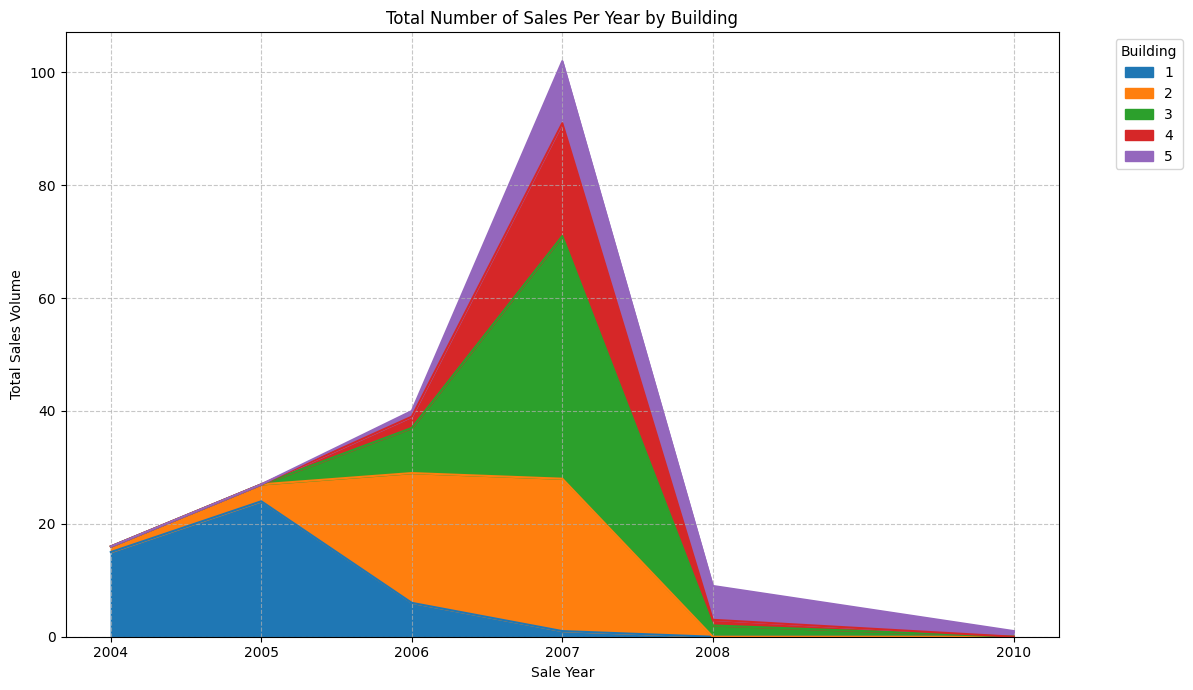

In [34]:
# Pivot the data to have years as index, building as columns, and sales_volume as values
pivoted_sales = sales_data_for_plot.pivot(index='sale_year', columns='building', values='sales_volume').fillna(0)

# Plotting the stacked area chart
plt.figure(figsize=(12, 7))
pivoted_sales.plot(kind='area', stacked=True, ax=plt.gca())

plt.title('Total Number of Sales Per Year by Building')
plt.xlabel('Sale Year')
plt.ylabel('Total Sales Volume')
plt.xticks(pivoted_sales.index)
plt.legend(title='Building', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights:**

From the stacked area chart and the underlying `pivoted_sales` data, **Building 1** shows a significant decrease in sales over the years. Its sales volume was relatively high in the initial years (15 sales in 2004, 24 sales in 2005) but then dramatically dropped to 6 sales in 2006, 1 sale in 2007, and no sales (0) in 2008 and 2010. This trend indicates a clear and significant reduction in sales for **Building 1** from the earlier period to the later years.

## Summary of Data Analysis Insights for Stakeholders

This summary synthesizes key findings from the analysis of property transactions and customer data, providing insights relevant for strategic decision-making.

### Key Findings:

1.  **Property Characteristics:**
    *   The **average area of Building Type 1** is approximately **928.04 square feet**.
    *   The **most common property type sold is 'Apartment'**.
    *   **Building 4** has the **highest average property price** at approximately **$290,239.52**.

2.  **Geographical & Sales Performance:**
    *   The **average cost of a building in Mexico** is approximately **$338,181.18**.
    *   **Nevada** has the **second-highest number of properties sold**.
    *   The **year 2007 brought in the highest revenue**, totaling approximately **$27,451,798.34**.
    *   **California and Nevada** jointly account for a significant **82% of the company's total revenue**.
    *   **Building 1** showed a **significant decrease in sales** over the years, starting strong in 2004-2005 but dropping to zero sales in 2008 and 2010.

3.  **Customer Demographics & Satisfaction:**
    *   The **most common age range of property buyers is 36-45 years**.
    *   The age distribution of customers is **right-skewed and unimodal**, indicating a concentration of younger to middle-aged buyers, with a notable presence of older customers.
    *   There is a **weak negative correlation (-0.17) between customer's age and property price**, suggesting a slight tendency for younger buyers to purchase more expensive properties and older buyers to purchase less expensive ones, but not a strong predictive relationship.
    *   **Canada** has the **highest average deal satisfaction score of 5.00**.

4.  **Unsold Properties:**
    *   There are **6 unsold properties** in the price range of **$496,201–$538,272**.

### Strategic Insights & Next Steps:

*   **Revenue Concentration:** The high revenue contribution from California and Nevada indicates these are critical markets. Further analysis into successful strategies in these states could be beneficial.
*   **Targeted Marketing:** The most common buyer age range (36-45) provides a clear demographic for targeted marketing efforts.
*   **Building Performance:** The significant decline in sales for Building 1 warrants immediate investigation into specific factors contributing to this trend (e.g., property condition, market changes, pricing).
*   **Customer Satisfaction:** The high satisfaction in Canada could offer insights into best practices that could be replicated in other regions.
*   **Unsold Inventory:** Investigating the 6 unsold properties in the high-price interval could reveal specific challenges or opportunities related to high-end inventory.

# Project Steps Summary:

**1. Load Datasets:**
   - The `properties.csv` and `customers.csv` files were loaded into pandas DataFrames, named `df_properties` and `df_customers`, respectively.
   - The `.head()` method was used to display the first few rows of each DataFrame for initial verification.

**2. Exploratory Data Analysis (EDA):**
   - **Inspect Data Information and Types:** The `.info()` method was used on both `df_properties` and `df_customers` to check data types, non-null counts, and column names. This revealed `date_sale` and `price` as `object` types in `df_properties` and `birth_date` as `object` type in `df_customers`, along with Byte Order Mark (BOM) characters in `id` and `customerid` columns.
   - **Check for Missing Values:** The `.isnull().sum()` method was applied to both DataFrames. Missing values were found in `customerid` (72) in `df_properties`, and `birth_date` (7), `sex` (7), and `state` (8) in `df_customers`.
   - **Check for Data Inconsistencies:** Column names were inspected for BOM characters (`\ufeff`) and special characters. Unique values in categorical columns like `building`, `type`, `status`, `sex`, `state`, `purpose`, `mortgage`, and `source` were examined using `.unique()` and `.value_counts()` to identify inconsistencies (e.g., leading/trailing spaces in 'Sold' and '-' in `status`, and `customerid`).
   - **Generate Descriptive Statistics:** The `.describe()` method was used on both DataFrames to obtain summary statistics for numerical columns, providing insights into distribution, central tendency, and variability of `area`, `price`, and `deal_satisfaction`.

**3. Data Preprocessing and Cleaning:**
   - **Clean Column Names:** BOM characters (`\ufeff`) were removed from `id` and `customerid` columns. All column names were converted to lowercase. Special characters and spaces in column names (e.g., `property#`, `unnamed: 0`) were replaced with underscores using regular expressions to standardize them (e.g., `property`, `unnamed_0`).
   - **Handle Missing Values:**
     - In `df_customers`, missing values in the `sex` and `state` columns were filled using their respective modes.
     - Rows with missing `birth_date` values in `df_customers` were dropped.
   - **Correct Data Types:**
     - In `df_properties`, the `date_sale` column was converted to `datetime` objects, and the `price` column was cleaned by removing '$' and ',' characters and then converted to `float`.
     - In `df_customers`, the `birth_date` column was converted to `datetime` objects.
   - **Strip Whitespace:** Leading/trailing whitespaces were removed from the `customerid` and `status` columns in `df_properties` to ensure consistency before merging.

**4. Merge Datasets:**
   - The `df_properties` and `df_customers` DataFrames were merged into a new DataFrame called `df_merged`.
   - A `left` merge was performed using `customerid` as the common key, preserving all records from `df_properties` and adding matching customer information from `df_customers`.
   - The `.head()` and `.info()` methods were used on `df_merged` to verify the successful integration of data and inspect the new structure and data types.
   - Redundant `unnamed_0_x` and `unnamed_0_y` columns (artifacts from original `Unnamed: 0` columns) were dropped from `df_merged` to clean the DataFrame further.

# Conclusion


## Summary:

### Q&A
The main goal of the data analysis phase was to extract key insights from the cleaned and merged property and customer datasets. This involved understanding property characteristics, geographical and sales performance, customer demographics and satisfaction, and identifying any unsold inventory.

### Data Analysis Key Findings
*   The average area of Building Type 1 is approximately 928.04 square feet.
*   The most common property type sold is 'Apartment'.
*   Building 4 exhibits the highest average property price, at approximately \$290,239.52.
*   The average cost of a building in Mexico is approximately \$338,181.18.
*   Nevada recorded the second-highest number of properties sold.
*   The year 2007 generated the highest revenue, totaling approximately \$27,451,798.34.
*   California and Nevada collectively contribute a significant 82% of the company's total revenue.
*   Building 1 showed a substantial decrease in sales over the years, with zero sales reported in 2008 and 2010.
*   The most frequent age range for property buyers is 36-45 years, with the customer age distribution being right-skewed and unimodal.
*   There is a weak negative correlation (-0.17) between customer's age and property price.
*   Canada achieved the highest average deal satisfaction score of 5.00.
*   There are 6 unsold properties within the price range of \$496,201–\$538,272.

### Insights or Next Steps
*   **Strategic Market Focus:** Given the high revenue concentration in California and Nevada, further analysis into successful strategies within these critical markets could yield transferable insights for other regions.
*   **Targeted Marketing Opportunities:** The prevalent buyer age range of 36-45 years presents a clear demographic for highly targeted marketing campaigns.
*   **Performance Investigation:** The significant sales decline in Building 1 necessitates an immediate investigation into underlying factors such as property condition, market shifts, or pricing strategies.
*   **Best Practice Replication:** The exceptionally high customer satisfaction in Canada offers valuable insights into practices that could be benchmarked and replicated to improve satisfaction in other operational areas.
